In [32]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from glob import glob
from alive_progress import alive_bar
from matplotlib.colors import LogNorm

In [40]:
folder = r'C:\Users\7011DAC\Desktop\Data\zoey/'
files = glob(folder + '*.h5')
files

['C:\\Users\\7011DAC\\Desktop\\Data\\zoey\\100_imgs_0.h5',
 'C:\\Users\\7011DAC\\Desktop\\Data\\zoey\\100_imgs_1.h5',
 'C:\\Users\\7011DAC\\Desktop\\Data\\zoey\\100_imgs_real_0.h5',
 'C:\\Users\\7011DAC\\Desktop\\Data\\zoey\\100_imgs_real_1.h5',
 'C:\\Users\\7011DAC\\Desktop\\Data\\zoey\\grid_scan_11_11_steps_0.h5']

In [41]:
with h5py.File(files[3], 'r') as f:
    imgs = f['entry']['data']['data'][:]

In [42]:
imgs.shape

(100, 2048, 2048)

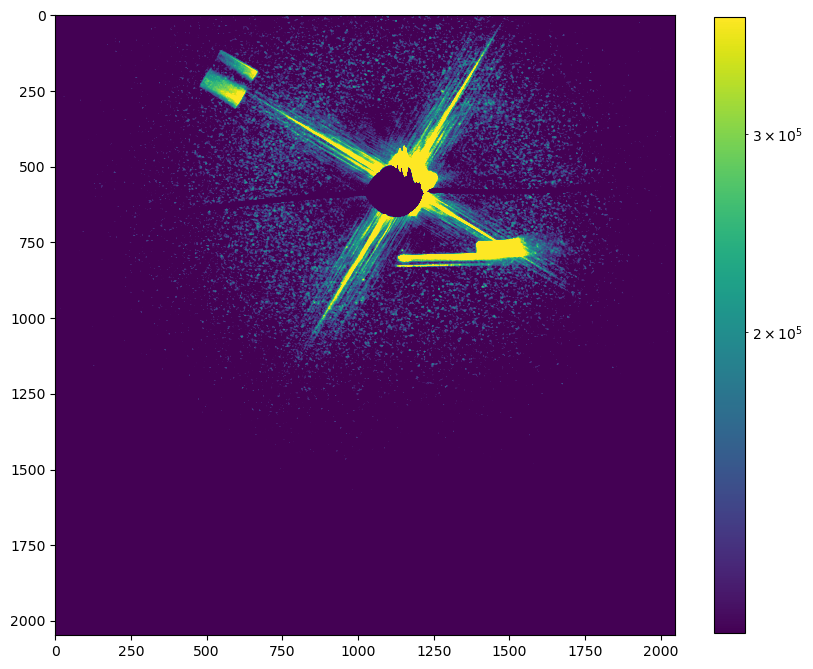

In [47]:
img = imgs.sum(axis=0)

plt.figure(figsize=(10,10))
plt.imshow(img, norm=LogNorm(vmin=np.percentile(img, 80), vmax=np.percentile(img,99)))
plt.colorbar(shrink=0.8)
plt.show()

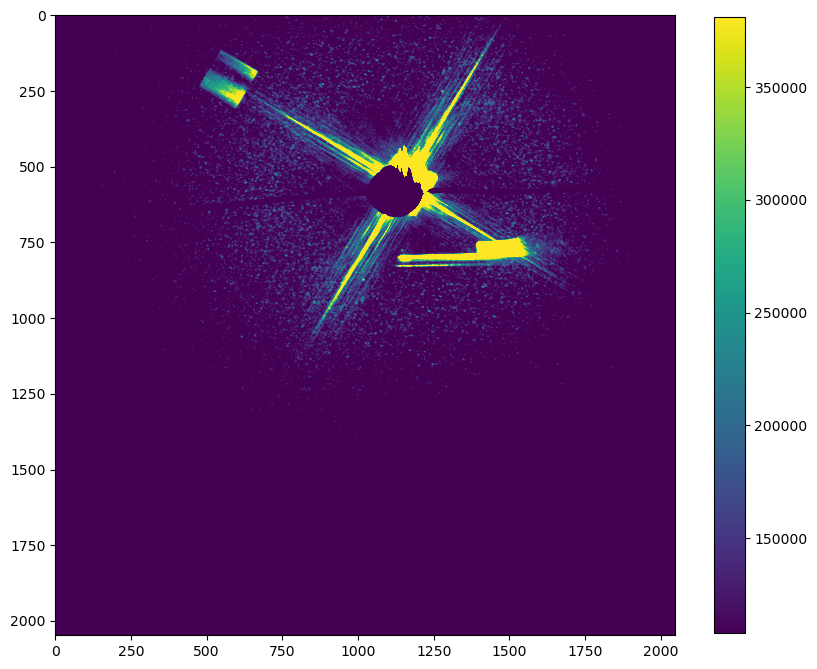

In [48]:
img = imgs.sum(axis=0)

plt.figure(figsize=(10,10))
plt.imshow(img, vmin=np.percentile(img, 80), vmax=np.percentile(img,99))
plt.colorbar(shrink=0.8)
plt.show()

In [16]:
s = imgs.shape[-1]

In [17]:
big_img = np.zeros((11*s, 11*s))
ii = 0
for i in range(11):
    for j in range(11):
        big_img[i*s:(i+1)*s, j*s:(j+1)*s] = imgs[ii]
        ii += 1

IndexError: index 119 is out of bounds for axis 0 with size 119

In [18]:
11*11

121

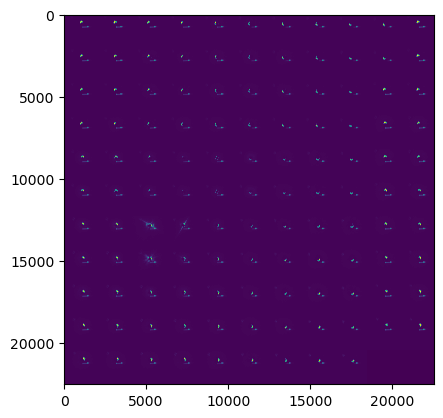

In [22]:
plt.figure()
plt.imshow(big_img)
plt.savefig(folder+'grid_test.png', dpi=200)